In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from tensorflow import keras as k;

import numpy as np

from utils import plot_2d, test_model, test_model_with_standard_scaler, test_keras_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# MLP vs Logistic Regression

### MLP performing better than Logistic Regression

Logistic Regression being a method that fits a linear function to the dataset, applying it to one with polynomial boundaries will be inadequate. In this case, a Multi Layer Perceptron model will certainly work better, since it can actually reproduce this polynomial characteristic in its classification.


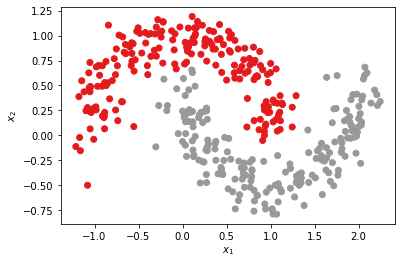

In [2]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )
    
def g_mlp():
    return datasets.make_moons(
        n_samples=400,
        noise=.14,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

Mean AUC score: 0.992


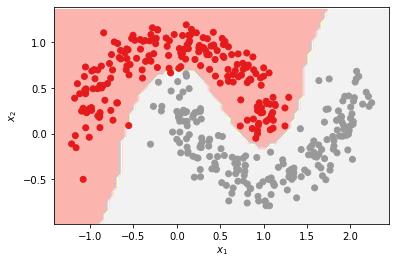

In [3]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32, 32, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)
test_model_with_standard_scaler(mlp, X, y)

Mean AUC score: 0.848


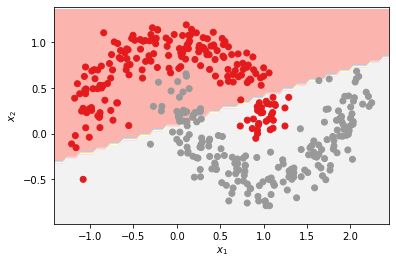

In [4]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

### Logistic Regression performing better than MLP

In short, this can't reliably happen. By its nature, Logistic Regression can be a subset of a MLP. One could simulate that by creating a MLP that consists of: 
* only one hidden node with the identity activation function,
* one output node with zero bias and logistic sigmoid activation. 

Here, we use a dataset with its classes split by a linear function, thus being the best case scenario for the LR, where it can perform similarly as a MLP.

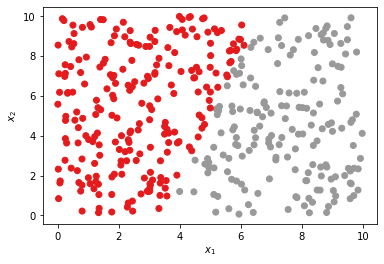

In [5]:
def g_lr():
    def classify(x1, x2):
        func = 3 * x1 - 10
        return int(func / x2 > 1) # 1 or 0 as label

    X = np.random.rand(400, 2) * 10
    y = np.asarray([classify(x1, x2) for x1, x2 in X])
    return X, y

X, y = g_lr()
plot_2d(X, y)

Mean AUC score: 0.996


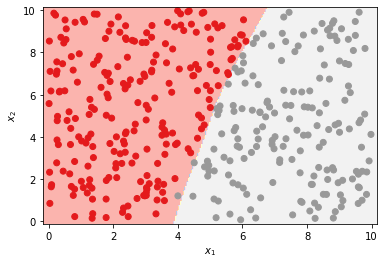

In [6]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16, 8),
    activation='relu',
    solver='adam',
    max_iter=3000
)
test_model_with_standard_scaler(mlp, X, y)

Mean AUC score: 0.987


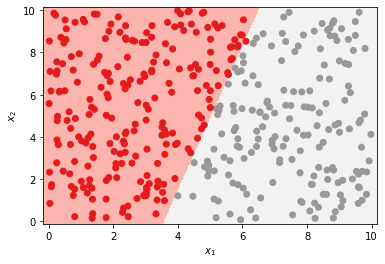

In [7]:
lr = LogisticRegression(max_iter=1000)
test_model(lr, X, y)

## MLP vs kNN

### MLP performing better than kNN

Here we have a dataset that is defined by multi-dimensional gaussian distributions. Given its polynomial nature, a MLP model is suitable to fit the data, meanwhile a kNN model struggles to use its lookout on neighbors to achieve a reasonable result given not only the dataset's complexity but also the high dimensionality.

Reducing the dataset dimension to 2D...


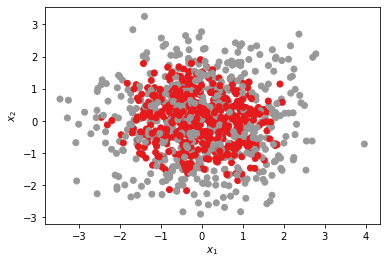

In [8]:
def g_mlp():
    return datasets.make_gaussian_quantiles(
        n_samples=1000,
        n_features=8,
        n_classes=2,
        random_state=42
    )

X, y = g_mlp()
plot_2d(X, y)

In [9]:
mlp = MLPClassifier(
    hidden_layer_sizes=(512, 512, 256, 16),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
test_model_with_standard_scaler(mlp, X, y)

Mean AUC score: 0.936
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

Mean AUC score: 0.680
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


### kNN performing better than MLP

The idea behind the following dataset was to create a big amount of randomly placed blobs and labeling them with no specific criteria. The result is data that fits kNN's assumptions: that the target label is able to be reliably determined by looking around the data point's neighbors.

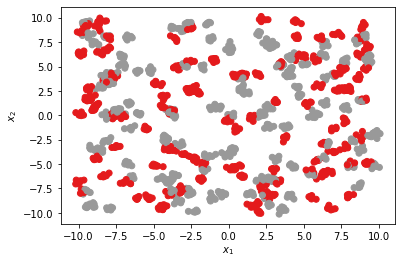

In [11]:
def g_knn():
    X, y = datasets.make_blobs(
        n_samples=1500,
        n_features=2,
        centers=220,
        cluster_std=.16,
        random_state=42
    )
    y = y % 2 # to reduce the amount of different labels to 2
    return X, y
    
X, y = g_knn()
plot_2d(X, y)

Mean AUC score: 0.559


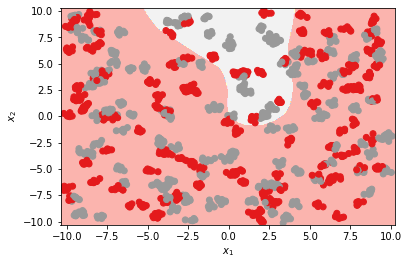

In [12]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 64, 32, 8),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

Mean AUC score: 0.924


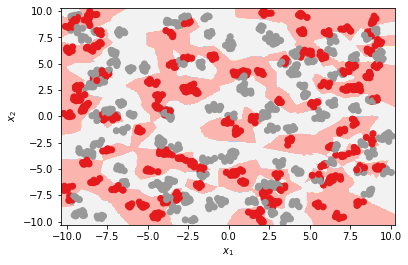

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
test_model(knn, X, y)

## MLP ReLU vs MLP Sigmoid

### ReLU performing better than Sigmoid

There is a reason for ReLU to be so widespread among neural network models, and that's because it consistently solves the problem of vanishing gradients, common for models with sigmoid activation functions, while also having a simple derivative that results in a quicker computation time. We can observe that the dataset below, relatively easy to be fitted by a model using ReLU, can cause struggles such as the aforementioned vanishing gradient phenomenon on a model using the sigmoid function.

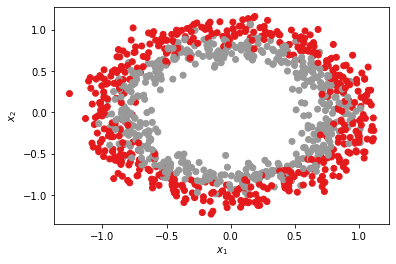

In [14]:
def g_relu():
    X, y = datasets.make_circles(n_samples=1000, noise=0.1, random_state=42)
    return X, y

X, y = g_relu()
plot_2d(X, y)

Mean AUC score: 0.832


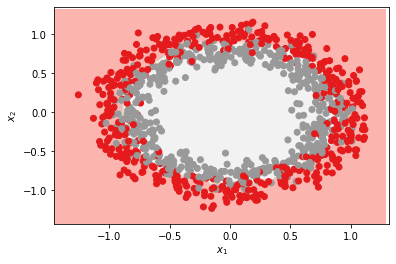

In [15]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 8),
    activation='relu',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

Mean AUC score: 0.502


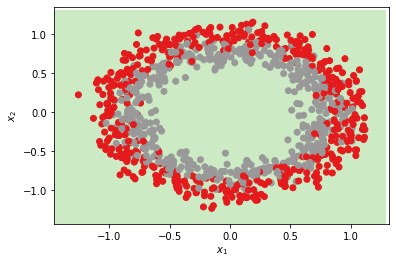

In [16]:
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 128, 8),
    activation='logistic',
    solver='adam',
    max_iter=1000
)
test_model_with_standard_scaler(mlp, X, y)

### Sigmoid performing better than ReLU

Here we have a simple dataset that splits two classes by a linear function, which should be easily solved by most methods studied in this class. In this case, ReLU is unable to do so because of a phenomenon called Dying ReLU. This is caused when every hidden layer's coefficient have a below zero value, thus causing the gradient descent to be unable to recover from that state and fit the data to the model. In this case, since it's very much difficult to determine a dataset that may cause this, we initialized the coefficients manually on values below zero to simulate the situation.

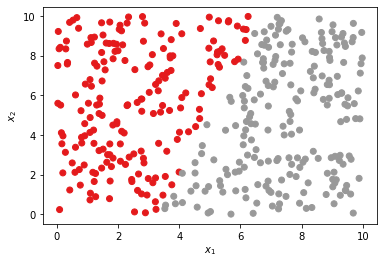

In [17]:
def g_sigmoid():
    def classify(x1, x2):
        func = 3 * x1 - 10
        return int(func / x2 > 1) # 1 or 0 as label

    X = np.random.rand(400, 2) * 10
    y = np.asarray([classify(x1, x2) for x1, x2 in X])
    return X, y

X, y = g_sigmoid()
plot_2d(X, y)

Mean AUC score: 0.500


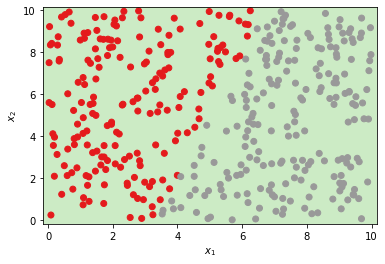

In [18]:
model = k.Sequential()
init = k.initializers.RandomUniform(minval=-1, maxval=0)
model.add(k.layers.Dense(12, input_dim=2, activation='relu', kernel_initializer=init))
model.add(k.layers.Dense(12, activation='relu', kernel_initializer=init))
model.add(k.layers.Dense(1, activation='sigmoid', kernel_initializer=init))

test_keras_model(model, X, y)

Mean AUC score: 0.974


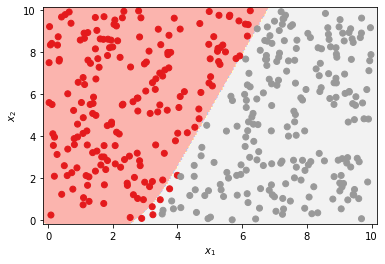

In [19]:
model = k.Sequential()
init = k.initializers.RandomUniform(minval=-1, maxval=0)
model.add(k.layers.Dense(12, input_dim=2, activation='sigmoid', kernel_initializer=init))
model.add(k.layers.Dense(12, activation='sigmoid', kernel_initializer=init))
model.add(k.layers.Dense(1, activation='sigmoid', kernel_initializer=init))

test_keras_model(model, X, y)